Modelos preditivos pra prever a tarifa e modelo pra prever quem morre com os dados do Titanic

Primeiro modelo: tarifa

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv('titanic.csv')
df

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500
...,...,...,...,...,...,...,...,...
882,0,2,Rev. Juozas Montvila,male,27.0,0,0,13.0000
883,1,1,Miss. Margaret Edith Graham,female,19.0,0,0,30.0000
884,0,3,Miss. Catherine Helen Johnston,female,7.0,1,2,23.4500
885,1,1,Mr. Karl Howell Behr,male,26.0,0,0,30.0000


In [3]:
df.apply(lambda x:sum(x.isnull()), axis=0)

Survived                   0
Pclass                     0
Name                       0
Sex                        0
Age                        0
Siblings/Spouses Aboard    0
Parents/Children Aboard    0
Fare                       0
dtype: int64

In [4]:
from sklearn.preprocessing import LabelEncoder
var_mod = ['Sex'] #1:Male 0: Female
le = LabelEncoder()

for i in var_mod:
    df[i] = le.fit_transform(df[i])

df

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,1,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,0,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,0,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,0,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,1,35.0,0,0,8.0500
...,...,...,...,...,...,...,...,...
882,0,2,Rev. Juozas Montvila,1,27.0,0,0,13.0000
883,1,1,Miss. Margaret Edith Graham,0,19.0,0,0,30.0000
884,0,3,Miss. Catherine Helen Johnston,0,7.0,1,2,23.4500
885,1,1,Mr. Karl Howell Behr,1,26.0,0,0,30.0000


In [5]:
df_x = df.drop(axis=1, columns=['Name'])
df_x

,Survived,Pclass,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,1,22.0,1,0,7.2500
1,1,1,0,38.0,1,0,71.2833
2,1,3,0,26.0,0,0,7.9250
3,1,1,0,35.0,1,0,53.1000
4,0,3,1,35.0,0,0,8.0500
...,...,...,...,...,...,...,...
882,0,2,1,27.0,0,0,13.0000
883,1,1,0,19.0,0,0,30.0000
884,0,3,0,7.0,1,2,23.4500
885,1,1,1,26.0,0,0,30.0000


In [22]:
a =df_x[df_x['Fare']==0]
a

,Survived,Pclass,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
178,0,3,1,36.0,0,0,0.0
261,0,1,1,40.0,0,0,0.0
269,1,3,1,25.0,0,0,0.0
275,0,2,1,21.0,0,0,0.0
300,0,3,1,19.0,0,0,0.0
411,0,2,1,22.0,0,0,0.0
463,0,2,1,21.0,0,0,0.0
478,0,2,1,37.0,0,0,0.0
594,0,3,1,49.0,0,0,0.0
630,0,1,1,30.0,0,0,0.0


In [15]:
dfsemfare0 = df_x.drop([178,261,269,275,300,411,463,478,594,630,671,728,802,811,818])
dfsemfare0

,Survived,Pclass,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,1,22.0,1,0,7.2500
1,1,1,0,38.0,1,0,71.2833
2,1,3,0,26.0,0,0,7.9250
3,1,1,0,35.0,1,0,53.1000
4,0,3,1,35.0,0,0,8.0500
...,...,...,...,...,...,...,...
882,0,2,1,27.0,0,0,13.0000
883,1,1,0,19.0,0,0,30.0000
884,0,3,0,7.0,1,2,23.4500
885,1,1,1,26.0,0,0,30.0000


In [23]:
df.groupby(['Pclass']).describe()

Survived                                                 Sex            \
          count      mean       std  min  25%  50%  75%  max  count      mean   
Pclass                                                                          
1         216.0  0.629630  0.484026  0.0  0.0  1.0  1.0  1.0  216.0  0.564815   
2         184.0  0.472826  0.500623  0.0  0.0  0.0  1.0  1.0  184.0  0.586957   
3         487.0  0.244353  0.430145  0.0  0.0  0.0  0.0  1.0  487.0  0.704312   

        ... Parents/Children Aboard        Fare                             \
        ...                     75%  max  count       mean        std  min   
Pclass  ...                                                                  
1       ...                     0.0  4.0  216.0  84.154687  78.380373  0.0   
2       ...                     1.0  3.0  184.0  20.662183  13.417399  0.0   
3       ...                     0.0  6.0  487.0  13.707707  11.817309  0.0   

                                           
             25%      50%   75%       max  
Pclass                                     
1       30.92395  60.2875  93.5  512.3292  
2       13.00000  14.2500  26.0   73.5000  
3        7.75000   8.0500  15.5   69.5500  

[3 rows x 48 columns]

In [24]:
dfsemfare0.groupby(['Pclass']).describe()
#disso tiramos que nçao precisaremos fazer limpeza de dados


Survived                                                 Sex            \
          count      mean       std  min  25%  50%  75%  max  count      mean   
Pclass                                                                          
1         211.0  0.644550  0.479788  0.0  0.0  1.0  1.0  1.0  211.0  0.554502   
2         178.0  0.488764  0.501284  0.0  0.0  0.0  1.0  1.0  178.0  0.573034   
3         483.0  0.244306  0.430121  0.0  0.0  0.0  0.0  1.0  483.0  0.701863   

        ... Parents/Children Aboard        Fare                        \
        ...                     75%  max  count       mean        std   
Pclass  ...                                                             
1       ...                     0.5  4.0  211.0  86.148874  78.212155   
2       ...                     1.0  3.0  178.0  21.358661  13.083169   
3       ...                     0.0  6.0  483.0  13.821229  11.799807   

                                                      
            min      25%      50%      75%       max  
Pclass                                                
1        5.0000  32.9104  61.9792  99.9625  512.3292  
2       10.5000  13.0000  15.0229  26.0000   73.5000  
3        4.0125   7.7500   8.0500  15.5000   69.5500  

[3 rows x 48 columns]

In [37]:
#Vou organizar subdataframes por classe
class_1 = df_x[df_x["Pclass"].isin([1])]
class_2 = df_x[df_x["Pclass"].isin([2])]
class_3 = df_x[df_x["Pclass"].isin([3])]
class_1
class_2
class_3


,Survived,Pclass,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,1,22.0,1,0,7.2500
2,1,3,0,26.0,0,0,7.9250
4,0,3,1,35.0,0,0,8.0500
5,0,3,1,27.0,0,0,8.4583
7,0,3,1,2.0,3,1,21.0750
...,...,...,...,...,...,...,...
878,0,3,0,22.0,0,0,10.5167
880,0,3,1,25.0,0,0,7.0500
881,0,3,0,39.0,0,5,29.1250
884,0,3,0,7.0,1,2,23.4500


In [43]:
class_1['total menbers'] = class_1['Siblings/Spouses Aboard'] + class_1['Parents/Children Aboard'] + 1
class_2['total menbers'] = class_2['Siblings/Spouses Aboard'] + class_2['Parents/Children Aboard'] + 1
class_3['total menbers'] = class_3['Siblings/Spouses Aboard'] + class_3['Parents/Children Aboard'] + 1
class_1

C:\Users\l.santos.de.sousa\AppData\Local\Temp\ipykernel_17876\975795676.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  class_1['total menbers'] = class_1['Siblings/Spouses Aboard'] + class_1['Parents/Children Aboard'] + 1
C:\Users\l.santos.de.sousa\AppData\Local\Temp\ipykernel_17876\975795676.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  class_2['total menbers'] = class_2['Siblings/Spouses Aboard'] + class_2['Parents/Children Aboard'] + 1
C:\Users\l.santos.de.sousa\AppData\Local\Temp\ipykernel_17

,Survived,Pclass,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare,total menbers
1,1,1,0,38.0,1,0,71.2833,2
3,1,1,0,35.0,1,0,53.1000,2
6,0,1,1,54.0,0,0,51.8625,1
11,1,1,0,58.0,0,0,26.5500,1
23,1,1,1,28.0,0,0,35.5000,1
...,...,...,...,...,...,...,...,...
867,1,1,0,47.0,1,1,52.5542,3
868,0,1,1,33.0,0,0,5.0000,1
875,1,1,0,56.0,0,1,83.1583,2
883,1,1,0,19.0,0,0,30.0000,1


In [44]:
#Agora vou fazer a média ponderada das tarifas por classe
def weighted_average(group):
   weights = group['total menbers']
   Fare = group['Fare']   
   return np.average(height,weights=weights)

In [6]:
df['Fare'].describe()

count    887.00000
mean      32.30542
std       49.78204
min        0.00000
25%        7.92500
50%       14.45420
75%       31.13750
max      512.32920
Name: Fare, dtype: float64

Segundo modelo: Sobreviventes

In [58]:
df_x = df.drop(axis=1, columns=[ 'Survived', 'Name'])
df_x

,Pclass,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,3,1,22.0,1,0,7.2500
1,1,0,38.0,1,0,71.2833
2,3,0,26.0,0,0,7.9250
3,1,0,35.0,1,0,53.1000
4,3,1,35.0,0,0,8.0500
...,...,...,...,...,...,...
882,2,1,27.0,0,0,13.0000
883,1,0,19.0,0,0,30.0000
884,3,0,7.0,1,2,23.4500
885,1,1,26.0,0,0,30.0000


In [59]:
#regressão linear
df_y = df[['Survived']]
df_y

,Survived
0,0
1,1
2,1
3,1
4,0
...,...
882,0
883,1
884,0
885,1


In [60]:
from sklearn.model_selection import train_test_split

xr_train, xr_test, yr_train, yr_test = train_test_split(df_x, df_y, test_size=0.3, random_state=4)


In [61]:
from sklearn.linear_model import LinearRegression

modelr = LinearRegression().fit(xr_train, yr_train)

In [62]:
print(modelr.intercept_)
print(modelr.coef_)

[1.36590486]
[[-1.83938142e-01 -5.19039510e-01 -6.86879575e-03 -4.33940686e-02
  -7.97251437e-04  4.23060172e-04]]


In [64]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

yr_predict = modelr.predict(xr_train)

print(mean_absolute_error(yr_train, yr_predict))
print(mean_squared_error(yr_train, yr_predict))
print(mean_absolute_error(yr_train, yr_predict)/yr_train.mean())


0.28899726305651896
0.13962862353789088
Survived    0.722493
dtype: float64


In [65]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

yr_predict = modelr.predict(xr_test)

print(mean_absolute_error(yr_test, yr_predict))
print(mean_squared_error(yr_test, yr_predict))
print(mean_absolute_error(yr_test, yr_predict)/yr_test.mean())

0.29882423943640707
0.15238144622108452
Survived    0.848788
dtype: float64


In [68]:
#knn

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.2, random_state=4)

print(x_train.shape)
print(x_test.shape)

(709, 6)
(178, 6)


In [69]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(x_train, y_train)

C:\Python\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=7)

In [70]:
from sklearn.metrics import accuracy_score, confusion_matrix

y_predict = knn. predict(x_test)

print(accuracy_score(y_test, y_predict))
print(confusion_matrix(y_test, y_predict))

0.6797752808988764
[[90 27]
 [30 31]]


In [74]:
k_range = range(1,30)
scores = {}
scores_list = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
    y_pred = knn.predict(x_test)
    scores[k] = accuracy_score(y_test, y_pred)
    scores_list.append(scores[k]) 
scores

C:\Python\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Python\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Python\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Python\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


{1: 0.6629213483146067,
 2: 0.702247191011236,
 3: 0.6404494382022472,
 4: 0.6910112359550562,
 5: 0.6460674157303371,
 6: 0.6685393258426966,
 7: 0.6797752808988764,
 8: 0.6797752808988764,
 9: 0.6685393258426966,
 10: 0.6629213483146067,
 11: 0.6685393258426966,
 12: 0.702247191011236,
 13: 0.7134831460674157,
 14: 0.7247191011235955,
 15: 0.7247191011235955,
 16: 0.7303370786516854,
 17: 0.7247191011235955,
 18: 0.7303370786516854,
 19: 0.7191011235955056,
 20: 0.7415730337078652,
 21: 0.7415730337078652,
 22: 0.7134831460674157,
 23: 0.7134831460674157,
 24: 0.7191011235955056,
 25: 0.7191011235955056,
 26: 0.7247191011235955,
 27: 0.7303370786516854,
 28: 0.7191011235955056,
 29: 0.7359550561797753}

(0.5, 0.8)

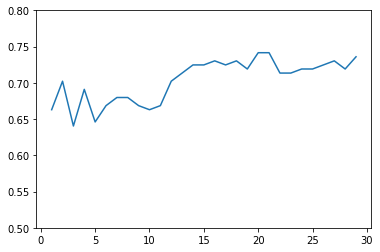

In [75]:
import matplotlib.pyplot as plt
%matplotlib inline 
#propriedade pra que a imagem seja plotada no jupyter notebook certinho

plt.plot(k_range, scores_list)
plt.ylim(0.5,0.8)

In [76]:
#arvore de decisão
from sklearn import tree
import graphviz

clf = tree.DecisionTreeClassifier()
clf.fit(x_train, y_train)

DecisionTreeClassifier()

NameError: name 'iris' is not defined